# Predicting Bulldozers price sale

## 1. Problem Def
> How good we can predecit future price of bulldozers  given data.
## 2. Data
> Data from `https://www.kaggle.com/competitions/bluebook-for-bulldozers/data`
> Following 3 datasets 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.
## 3. Evaluation
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
`https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview`
## 4. Features
Described in **Data Dictonary** at `https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
# Import training and validation Data

df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

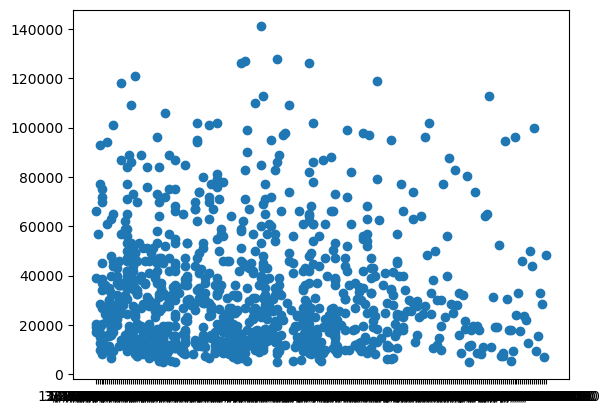

In [6]:
plt.scatter(df.saledate[:1000], df.SalePrice[:1000])


<Axes: >

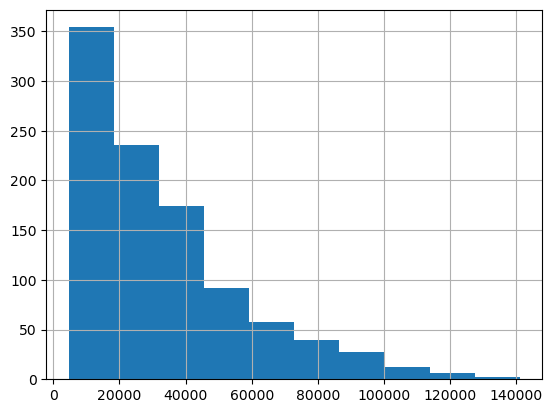

In [7]:
df.SalePrice[:1000].hist()

### Parsing Dates
When we work with time series data, we want to enrich the time and data component as much as possible

We can do that by telling pandas which of our columns have dates in it using the `parse_dates` parameter

In [8]:
# Import data again this time with parse dates
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [9]:
df.saledate.dtype # Type of date (datetime64 = <M8[ns])

dtype('<M8[ns]')

In [10]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

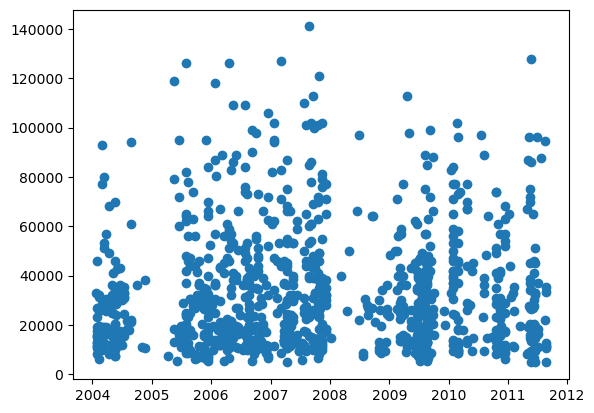

In [11]:
plt.scatter(df.saledate[:1000], df.SalePrice[:1000])


<BarContainer object of 1000 artists>

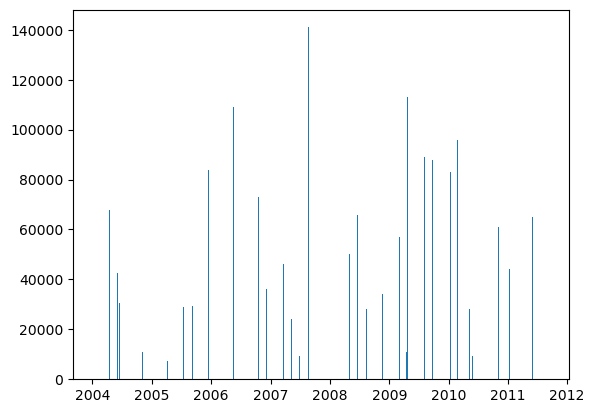

In [12]:
plt.bar(df.saledate[:1000], df.SalePrice[:1000])

### Sort DataFrame by saledate
Working with time series problem bteeer sort data by date

In [13]:
#Sort Data by data
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(), df.saledate.tail()

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 Name: saledate, dtype: datetime64[ns],
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

In [14]:
# Make copy of data for just backup 
df_tmp = df.copy()

### Add date time parameters for `saledate` column

In [15]:
# Adding sale year month day , ofweek , of year 
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [16]:
# And now we can remove original date col
df_tmp.drop("saledate", axis=1, inplace=True)

## Modeling
**Model Driven EDA**

In [17]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1) # Will take full CPU || to avoid np.random.seed we can use **random_state** in constructor
#model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"]) Can not use string values with model hence commenting :)

In [18]:
#Find which col contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [19]:
# Turn strings into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
df_tmp.state.cat.codes #Translate categories to numbers

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [21]:
#Check missing data by ration :)
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Fill missing values
#### Numeric Values First

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [23]:
# Check for which cols have missing numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label + "  ---null---")
    else:
        print(label + " <<<Not null>>> ")

SalesID <<<Not null>>> 
SalePrice <<<Not null>>> 
MachineID <<<Not null>>> 
ModelID <<<Not null>>> 
datasource <<<Not null>>> 
auctioneerID  ---null---
YearMade <<<Not null>>> 
MachineHoursCurrentMeter  ---null---
UsageBand <<<Not null>>> 
fiModelDesc <<<Not null>>> 
fiBaseModel <<<Not null>>> 
fiSecondaryDesc <<<Not null>>> 
fiModelSeries <<<Not null>>> 
fiModelDescriptor <<<Not null>>> 
ProductSize <<<Not null>>> 
fiProductClassDesc <<<Not null>>> 
state <<<Not null>>> 
ProductGroup <<<Not null>>> 
ProductGroupDesc <<<Not null>>> 
Drive_System <<<Not null>>> 
Enclosure <<<Not null>>> 
Forks <<<Not null>>> 
Pad_Type <<<Not null>>> 
Ride_Control <<<Not null>>> 
Stick <<<Not null>>> 
Transmission <<<Not null>>> 
Turbocharged <<<Not null>>> 
Blade_Extension <<<Not null>>> 
Blade_Width <<<Not null>>> 
Enclosure_Type <<<Not null>>> 
Engine_Horsepower <<<Not null>>> 
Hydraulics <<<Not null>>> 
Pushblock <<<Not null>>> 
Ripper <<<Not null>>> 
Scarifier <<<Not null>>> 
Tip_Control <<<Not null

In [24]:
# Fill numeric rows with the median
# Check for which cols have missing numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        # Add a binary col which tells us if the data was missing
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Fill missing numeric values with median
        df_tmp[label] = content.fillna(content.median())

In [25]:
# Check again for null numeric
# Check for which cols have missing numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label + "  ---null---")
    else:
        print(label + " <<<Not null>>> ")

SalesID <<<Not null>>> 
SalePrice <<<Not null>>> 
MachineID <<<Not null>>> 
ModelID <<<Not null>>> 
datasource <<<Not null>>> 
auctioneerID <<<Not null>>> 
YearMade <<<Not null>>> 
MachineHoursCurrentMeter <<<Not null>>> 
UsageBand <<<Not null>>> 
fiModelDesc <<<Not null>>> 
fiBaseModel <<<Not null>>> 
fiSecondaryDesc <<<Not null>>> 
fiModelSeries <<<Not null>>> 
fiModelDescriptor <<<Not null>>> 
ProductSize <<<Not null>>> 
fiProductClassDesc <<<Not null>>> 
state <<<Not null>>> 
ProductGroup <<<Not null>>> 
ProductGroupDesc <<<Not null>>> 
Drive_System <<<Not null>>> 
Enclosure <<<Not null>>> 
Forks <<<Not null>>> 
Pad_Type <<<Not null>>> 
Ride_Control <<<Not null>>> 
Stick <<<Not null>>> 
Transmission <<<Not null>>> 
Turbocharged <<<Not null>>> 
Blade_Extension <<<Not null>>> 
Blade_Width <<<Not null>>> 
Enclosure_Type <<<Not null>>> 
Engine_Horsepower <<<Not null>>> 
Hydraulics <<<Not null>>> 
Pushblock <<<Not null>>> 
Ripper <<<Not null>>> 
Scarifier <<<Not null>>> 
Tip_Control <<<

In [26]:
#Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [27]:
### Filling and turning categorical variables into numbers
# Check for which cols have missing numeric values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label + "  ---null---")


UsageBand  ---null---
fiSecondaryDesc  ---null---
fiModelSeries  ---null---
fiModelDescriptor  ---null---
ProductSize  ---null---
Drive_System  ---null---
Enclosure  ---null---
Forks  ---null---
Pad_Type  ---null---
Ride_Control  ---null---
Stick  ---null---
Transmission  ---null---
Turbocharged  ---null---
Blade_Extension  ---null---
Blade_Width  ---null---
Enclosure_Type  ---null---
Engine_Horsepower  ---null---
Hydraulics  ---null---
Pushblock  ---null---
Ripper  ---null---
Scarifier  ---null---
Tip_Control  ---null---
Tire_Size  ---null---
Coupler  ---null---
Coupler_System  ---null---
Grouser_Tracks  ---null---
Hydraulics_Flow  ---null---
Track_Type  ---null---
Undercarriage_Pad_Width  ---null---
Stick_Length  ---null---
Thumb  ---null---
Pattern_Changer  ---null---
Grouser_Type  ---null---
Backhoe_Mounting  ---null---
Blade_Type  ---null---
Travel_Controls  ---null---
Differential_Type  ---null---
Steering_Controls  ---null---


In [28]:
# Turn categorical values into numbers and fill missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1 # If value is null pandas will set it -1 so add +1

In [29]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [30]:
df_tmp.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05,412698.000000,412698.000000,...,412698.00000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.361548,1899.049637,1.259165e+03,0.413486,1697.462231,...,0.19562,1.273566,1.126720,0.684513,0.345611,2004.317382,6.300268,16.152894,2.594338,176.784094
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,16.763713,292.190243,1.633077e+04,0.941340,1281.860399,...,0.39680,2.644549,2.301722,1.503114,0.756225,5.821090,3.437276,8.429510,1.417971,103.910718
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,0.000000,1.000000
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,640.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,9.000000,2.000000,82.000000
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1413.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2006.000000,6.000000,16.000000,3.000000,165.000000
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,0.000000e+00,0.000000,2316.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2009.000000,9.000000,23.000000,3.000000,270.000000
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,3.000000,5059.000000,...,2.00000,10.000000,7.000000,4.000000,5.000000,2012.000000,12.000000,31.000000,6.000000,365.000000


In [31]:
df_tmp.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,False,True,True,False,True,True,True,True,True,False


In [32]:
%%time
# Intatiate model 
mdoel = RandomForestRegressor(n_jobs=-1)

#Fit model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 20min 25s
Wall time: 59.1 s


RandomForestRegressor(n_jobs=-1)

In [33]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

In [34]:
### Splitting data actual test
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

X_train, Y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_val, Y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice



In [35]:
#Building evaluation function(as required by competition RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error b\w predections and true label.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Function to evaluate model on other level
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE" : mean_absolute_error(Y_train, train_preds),
              "Valid MAE" : mean_absolute_error(Y_val, val_preds),
              "Training RSMLE": rmsle(Y_train, train_preds),
              "Valid RMSLE" : rmsle(Y_val, val_preds),
              "Training R2" : r2_score(Y_train, train_preds),
              "Valid R^2" : r2_score(Y_val, val_preds)}
    return scores

In [36]:
### Testing our model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
#Fit model
model.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1)

In [37]:
show_scores(model)

{'Training MAE': 1578.2015208725463,
 'Valid MAE': 6120.959637950402,
 'Training RSMLE': 0.08426351714047395,
 'Valid RMSLE': 0.25557446689440955,
 'Training R2': 0.9875150955953674,
 'Valid R^2': 0.8727175969771312}

In [38]:
# Hyper parameter with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_samples": [None]}
#Intatiate RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42)
                                                    , param_distributions=rf_grid, n_iter=2, cv=5, verbose=True)
rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [39]:
show_scores(rs_model)

{'Training MAE': 4285.721458970156,
 'Valid MAE': 6307.761273721821,
 'Training RSMLE': 0.20276790476405152,
 'Valid RMSLE': 0.2583028845639346,
 'Training R2': 0.9114368631809256,
 'Valid R^2': 0.8607853986013817}

In [40]:
#Hyperparams with GridSearchCV
# rf_grid_GSCV = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
#                 "max_depth": [None, 5, 10, 20, 30],
#                 "max_features": ["auto", "sqrt"],
#                 "min_samples_split": [2,4,6,],
#                 "min_samples_leaf": [1,2,4]}
# from sklearn.model_selection import GridSearchCV
# rs_model_GSCV = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
#                             param_grid=rf_grid_GSCV, cv=5, verbose=2)
# rs_model_GSCV.fit(X_train, Y_train)
# show_scores(rs_model_GSCV)

In [41]:
## Preprocessing Data
def preprocess_data(df):
    """
    Performs transformation on given df, handles NaN and non int
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    return df

In [42]:
df_test = pd.read_csv("Data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test = preprocess_data(df_test)
#df_test.columns.size, X_train.columns.size
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [43]:
# Test cols and train cols are different
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [44]:
# Manually adjust df_test to have auctioneerID_is_missing col
df_test["auctioneerID_is_missing"] = False

In [45]:
#Make pred on test
rs_model.best_estimator_

RandomForestRegressor(min_samples_leaf=17, min_samples_split=14,
                      n_estimators=10, n_jobs=-1, random_state=42)

In [46]:
idealModel = RandomForestRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=10,
                      n_estimators=20, n_jobs=-1, random_state=42)
idealModel.fit(X_train,Y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=10,
                      n_estimators=20, n_jobs=-1, random_state=42)

In [47]:
test_preds  = idealModel.predict(df_test.values)

D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
# Format predections into format for kaggle submission
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,25741.824721
1,1227844,24535.592804
2,1227847,63514.169358
3,1227848,79486.220843
4,1227863,29223.389644
...,...,...
12452,6643171,43964.407962
12453,6643173,14115.609309
12454,6643184,11655.119902
12455,6643186,15952.660869


### Feature Importance

Feature importance seek to fighure out which different atttributes of data are most impotant 

In [49]:
idealModel.feature_importances_

array([3.45908136e-02, 0.00000000e+00, 8.79810930e-03, 0.00000000e+00,
       0.00000000e+00, 3.45786506e-01, 0.00000000e+00, 0.00000000e+00,
       9.15403305e-05, 1.08217641e-01, 3.71513518e-02, 0.00000000e+00,
       0.00000000e+00, 3.62595217e-01, 7.64082630e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26600196e-02,
       0.00000000e+00, 0.00000000e+00, 2.47873269e-03, 3.81001441e-03,
       0.00000000e+00, 2.51044143e-03, 1.29041635e-03, 0.00000000e+00,
       0.00000000e+00, 1.95427424e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.16620212e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [56]:
# Helper fuction for plotting feature imporatance 

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    # Plot DF
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_xlabel("Featurte Importance")
    ax.set_ylabel("Features")

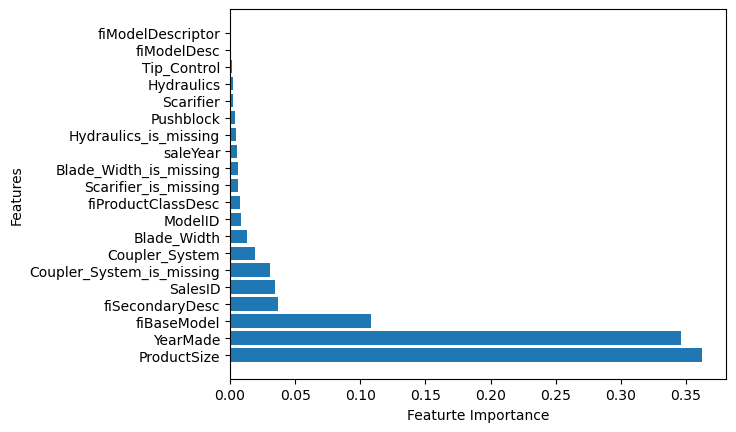

In [57]:
plot_features(X_train.columns, idealModel.feature_importances_)